In [1]:
import numpy as np
import pandas as pd
import glob 

In [2]:
# mencari directory saat ini
import os
os.getcwd()
# Merubah directory
os.chdir('D:\\ITS\\Tugas Akhir\\Source Code')
# Merubah directory (beneran)
os.chdir('D:/ITS/Tugas Akhir/Source Code')
# Path data
cur_path = "D:/ITS/Tugas Akhir/data/Endaq CSV/"

In [3]:
import os
FOLDER = cur_path
totalFiles = 0
totalDir = 0
for base, dirs, files in os.walk(FOLDER):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

print('Total number of files',totalFiles)
print('Total Number of directories',totalDir)

Searching in :  D:/ITS/Tugas Akhir/data/Endaq CSV/
Searching in :  D:/ITS/Tugas Akhir/data/Endaq CSV/bearing
Searching in :  D:/ITS/Tugas Akhir/data/Endaq CSV/misalignment
Searching in :  D:/ITS/Tugas Akhir/data/Endaq CSV/normal
Searching in :  D:/ITS/Tugas Akhir/data/Endaq CSV/unbalance
Total number of files 1440
Total Number of directories 4


In [4]:
dir_path1 = cur_path+'/normal/'
print('Total Data Normal :',len([entry for entry in os.listdir(dir_path1) if os.path.isfile(os.path.join(dir_path1, entry))]))
dir_path2 = cur_path+'/misalignment/'
print('Total Data Misalignment :',len([entry for entry in os.listdir(dir_path2) if os.path.isfile(os.path.join(dir_path2, entry))]))
dir_path3 = cur_path+'/unbalance'
print('Total Data Unbalance :',len([entry for entry in os.listdir(dir_path3) if os.path.isfile(os.path.join(dir_path3, entry))]))
dir_path4 = cur_path+'/bearing'
print('Total Data Bearing :',len([entry for entry in os.listdir(dir_path4) if os.path.isfile(os.path.join(dir_path4, entry))]))

Total Data Normal : 360
Total Data Misalignment : 360
Total Data Unbalance : 360
Total Data Bearing : 360


In [5]:
normal_file_names = glob.glob(cur_path+'/normal/*.csv')
imnormal_misalignment = glob.glob(cur_path+'/misalignment/*.csv')
imnormal_unbalance = glob.glob(cur_path+'/unbalance/*.csv')
imnormal_bearing = glob.glob(cur_path+'/bearing/*.csv')

In [6]:
# PREPROCESSING
# Normalized Data between -1 and 1
# FFT from time domain to freq domain
# Source https://stats.stackexchange.com/questions/178626/how-to-normalize-data-between-1-and-1

from sklearn.preprocessing import normalize
from numpy.fft import rfft, rfftfreq

# def data normal sumbu x
def data_1x(normal_file_names):
    for f1x in normal_file_names:
        df1x = pd.read_csv(f1x, header=None) # read the csv file
        data1x = pd.DataFrame(df1x)
        data1x.drop(data1x.columns[[0,2,3]], axis=1, inplace=True) #hapus kolom 0,2,3
        data1x = np.asarray(data1x)
        data1x = (2*((data1x - np.min(data1x)) / (np.max(data1x) - np.min(data1x)))-1) #normalisasi antara -1 dan 1
        # FFT 
        n=len(data1x)
        dt=1/20000 #time increment in each data
        data1x=rfft(data1x)*dt
        freq=rfftfreq(n,dt)
        data1x=abs(data1x)
        #print(data1x)
    return data1x 

# def data normal sumbu y
def data_1y(normal_file_names):
    for f1y in normal_file_names:
        df1y = pd.read_csv(f1y, header=None) # read the csv file
        data1y = pd.DataFrame(df1y)
        data1y.drop(data1y.columns[[0,1,3]], axis=1, inplace=True) #hapus kolom 0,1,3
        data1y = np.asarray(data1y)
        data1y = (2*((data1y - np.min(data1y)) / (np.max(data1y) - np.min(data1y)))-1) #normalisasi antara -1 dan 1
        # FFT 
        n=len(data1y)
        dt=1/20000 #time increment in each data
        data1y=rfft(data1y)*dt
        freq=rfftfreq(n,dt)
        data1y=abs(data1y)
        #print(data1y)
    return data1y 

# def data normal sumbu z
def data_1z(normal_file_names):
    for f1z in normal_file_names:
        df1z = pd.read_csv(f1z, header=None) # read the csv file
        data1z = pd.DataFrame(df1z)
        data1z.drop(data1z.columns[[0,1,2]], axis=1, inplace=True) #hapus kolom 0,1,2
        data1z = np.asarray(data1z)
        data1z = (2*((data1z - np.min(data1z)) / (np.max(data1z) - np.min(data1z)))-1) #normalisasi antara -1 dan 1
        # FFT 
        n=len(data1z)
        dt=1/20000 #time increment in each data
        data1z=rfft(data1z)*dt
        freq=rfftfreq(n,dt)
        data1z=abs(data1z)
        #print(data1z)
    return data1z 

# def data misalignment sumbu x
def data_2x(imnormal_misalignment):
    for f2x in imnormal_misalignment:
        df2x = pd.read_csv(f2x, header=None) # read the csv file
        data2x = pd.DataFrame(df2x)
        data2x.drop(data2x.columns[[0,2,3]], axis=1, inplace=True) #hapus kolom 0,2,3
        data2x = np.asarray(data2x)
        data2x = (2*((data2x - np.min(data2x)) / (np.max(data2x) - np.min(data2x)))-1) #normalisasi antara -1 dan 1
        # FFT 
        n=len(data2x)
        dt=1/20000 #time increment in each data
        data2x=rfft(data2x)*dt
        freq=rfftfreq(n,dt)
        data2x=abs(data2x)
        #print(data2x)
    return data2x

# def data misalignment sumbu y
def data_2y(imnormal_misalignment):
    for f2y in imnormal_misalignment:
        df2y = pd.read_csv(f2y, header=None) # read the csv file
        data2y = pd.DataFrame(df2y)
        data2y.drop(data2y.columns[[0,1,3]], axis=1, inplace=True) #hapus kolom 0,1,3
        data2y = np.asarray(data2y)
        data2y = (2*((data2y - np.min(data2y)) / (np.max(data2y) - np.min(data2y)))-1) #normalisasi antara -1 dan 1
        # FFT 
        n=len(data2y)
        dt=1/20000 #time increment in each data
        data2y=rfft(data2y)*dt
        freq=rfftfreq(n,dt)
        data2y=abs(data2y)
        #print(data2y)
    return data2y

# def data misalignment sumbu z
def data_2z(imnormal_misalignment):
    for f2z in imnormal_misalignment:
        df2z = pd.read_csv(f2z, header=None) # read the csv file
        data2z = pd.DataFrame(df2z)
        data2z.drop(data2z.columns[[0,1,2]], axis=1, inplace=True) #hapus kolom 0,1,2
        data2z = np.asarray(data2z)
        data2z = (2*((data2z - np.min(data2z)) / (np.max(data2z) - np.min(data2z)))-1) #normalisasi antara -1 dan 1
        # FFT 
        n=len(data2z)
        dt=1/20000 #time increment in each data
        data2z=rfft(data2z)*dt
        freq=rfftfreq(n,dt)
        data2z=abs(data2z)
        #print(data2z)
    return data2z

# def data unbalance sumbu x
def data_3x(imnormal_unbalance):
    for f3x in imnormal_unbalance:
        df3x = pd.read_csv(f3x, header=None) # read the csv file
        data3x = pd.DataFrame(df3x)
        data3x.drop(data3x.columns[[0,2,3]], axis=1, inplace=True) #hapus kolom 0,2,3
        data3x = np.asarray(data3x)
        data3x = (2*((data3x - np.min(data3x)) / (np.max(data3x) - np.min(data3x)))-1) #normalisasi antara -1 dan 1
        # FFT 
        n=len(data3x)
        dt=1/20000 #time increment in each data
        data3x=rfft(data3x)*dt
        freq=rfftfreq(n,dt)
        data3x=abs(data3x)
        #print(data3x)
    return data3x

# def data unbalance sumbu y
def data_3y(imnormal_unbalance):
    for f3y in imnormal_unbalance:
        df3y = pd.read_csv(f3y, header=None) # read the csv file
        data3y = pd.DataFrame(df3y)
        data3y.drop(data3y.columns[[0,1,3]], axis=1, inplace=True) #hapus kolom 0,1,3
        data3y = np.asarray(data3y)
        data3y = (2*((data3y - np.min(data3y)) / (np.max(data3y) - np.min(data3y)))-1) #normalisasi antara -1 dan 1
        # FFT 
        n=len(data3y)
        dt=1/20000 #time increment in each data
        data3y=rfft(data3y)*dt
        freq=rfftfreq(n,dt)
        data3y=abs(data3y)
        #print(data3y)
    return data3y

# def data unbalance sumbu z
def data_3z(imnormal_unbalance):
    for f3z in imnormal_unbalance:
        df3z = pd.read_csv(f3z, header=None) # read the csv file
        data3z = pd.DataFrame(df3z)
        data3z.drop(data3z.columns[[0,1,2]], axis=1, inplace=True) #hapus kolom 0,1,2
        data3z = np.asarray(data3z)
        data3z = (2*((data3z - np.min(data3z)) / (np.max(data3z) - np.min(data3z)))-1) #normalisasi antara -1 dan 1
        # FFT 
        n=len(data3z)
        dt=1/20000 #time increment in each data
        data3z=rfft(data3z)*dt
        freq=rfftfreq(n,dt)
        data3z=abs(data3z)
        #print(data3z)
    return data3z

# def data bearing sumbu x
def data_4x(imnormal_bearing):
    for f4x in imnormal_bearing:
        df4x = pd.read_csv(f4x, header=None) # read the csv file
        data4x = pd.DataFrame(df4x)
        data4x.drop(data4x.columns[[0,2,3]], axis=1, inplace=True) #hapus kolom 0,2,3
        data4x = np.asarray(data4x)
        data4x = (2*((data4x - np.min(data4x)) / (np.max(data4x) - np.min(data4x)))-1) #normalisasi antara -1 dan 1
        # FFT 
        n=len(data4x)
        dt=1/20000 #time increment in each data
        data4x=rfft(data4x)*dt
        freq=rfftfreq(n,dt)
        data4x=abs(data4x)
        #print(data4x)
    return data4x

# def data bearing sumbu y
def data_4y(imnormal_bearing):
    for f4y in imnormal_bearing:
        df4y = pd.read_csv(f4y, header=None) # read the csv file
        data4y = pd.DataFrame(df4y)
        data4y.drop(data4y.columns[[0,1,3]], axis=1, inplace=True) #hapus kolom 0,1,3
        data4y = np.asarray(data4y)
        data4y = (2*((data4y - np.min(data4y)) / (np.max(data4y) - np.min(data4y)))-1) #normalisasi antara -1 dan 1
        # FFT 
        n=len(data4y)
        dt=1/20000 #time increment in each data
        data4y=rfft(data4y)*dt
        freq=rfftfreq(n,dt)
        data4y=abs(data4y)
        #print(data4y)
    return data4y

# def data bearing sumbu z
def data_4z(imnormal_bearing):
    for f4z in imnormal_bearing:
        df4z = pd.read_csv(f4z, header=None) # read the csv file
        data4z = pd.DataFrame(df4z)
        data4z.drop(data4z.columns[[0,2,3]], axis=1, inplace=True) #hapus kolom 0,2,3
        data4z = np.asarray(data4z)
        data4z = (2*((data4z - np.min(data4z)) / (np.max(data4z) - np.min(data4z)))-1) #normalisasi antara -1 dan 1
        # FFT 
        n=len(data4z)
        dt=1/20000 #time increment in each data
        data4z=rfft(data4z)*dt
        freq=rfftfreq(n,dt)
        data4z=abs(data4z)
        #print(data4z)
    return data4z

In [7]:
# Data tiap sumbu x y z
data_normal_x = data_1x(normal_file_names)
data_normal_y = data_1y(normal_file_names)
data_normal_z = data_1z(normal_file_names)

data_misalignment_x = data_2x(imnormal_misalignment)
data_misalignment_y = data_2y(imnormal_misalignment)
data_misalignment_z = data_2z(imnormal_misalignment)

data_unbalance_x = data_3x(imnormal_unbalance)
data_unbalance_y = data_3y(imnormal_unbalance)
data_unbalance_z = data_3z(imnormal_unbalance)

data_bearing_x = data_4x(imnormal_bearing)
data_bearing_y = data_4y(imnormal_bearing)
data_bearing_z = data_4z(imnormal_bearing)

In [8]:
from scipy.stats import kurtosis
from scipy.stats import skew

def mean(data):
    data = np.asarray(data)
    data.flatten()
    M=data.mean()
    return M
def Max(data):
    data = np.asarray(data)
    data.flatten()
    Max1=data.max()
    return Max1
def Min(data):
    data = np.asarray(data)
    data.flatten()
    Min1=data.min()
    return Min1
def pp(data):
    data = np.asarray(data)
    data.flatten()
    PP=data.max()-data.min()
    return PP
def Variance(data):
    data = np.asarray(data)
    data.flatten()
    Var=data.var()
    return Var
def rms(data):
    data = np.asarray(data)
    data.flatten()
    Rms=np.sqrt(np.mean(data**2))
    return Rms
def Ab_mean(data):
    data = np.asarray(data)
    data.flatten()
    Abm=np.mean(np.absolute(data))
    return Abm
def Shapef(data):
    data = np.asarray(data)
    data.flatten()
    shapef=rms(data)/Ab_mean(data)
    return shapef
def Impulsef(data):
    data = np.asarray(data)
    data.flatten()
    impulse=Max(data)/Ab_mean(data)
    return impulse
def crestf(data):
    data = np.asarray(data)
    data.flatten()
    crest=Max(data)/rms(data)
    return crest
def SQRT_AMPL(data):
    data = np.asarray(data)
    data.flatten()
    SQRTA=(np.mean(np.sqrt(np.absolute(data))))**2
    return SQRTA

def clearancef(data):
    data = np.asarray(data)
    data.flatten()
    clrf=Max(data)/SQRT_AMPL(data)
    return clrf

In [9]:
# Ekstraksi fitur normal
data1x = data_normal_x
feature = []
for i in range(360):
    feature.append(mean(data1x[i]))
    feature.append(Max(data1x[i]))
    feature.append(Min(data1x[i]))
    feature.append(pp(data1x[i]))
    feature.append(Variance(data1x[i]))
    feature.append(rms(data1x[i]))
    feature.append(Ab_mean(data1x[i]))
    feature.append(Shapef(data1x[i]))
    feature.append(Impulsef(data1x[i]))
    feature.append(crestf(data1x[i]))
    feature.append(max(abs(data1x[i])))
    feature.append(clearancef(data1x[i]))
    K=kurtosis(data1x[i])
    feature.append(K)
    S=skew(data1x[i], axis=0, bias=False)
    feature.append(S)
data_1x = np.array(feature).reshape(360,14)

data1y = data_normal_y
feature = []
for i in range(360):
    feature.append(mean(data1y[i]))
    feature.append(Max(data1y[i]))
    feature.append(Min(data1y[i]))
    feature.append(pp(data1y[i]))
    feature.append(Variance(data1y[i]))
    feature.append(rms(data1y[i]))
    feature.append(Ab_mean(data1y[i]))
    feature.append(Shapef(data1y[i]))
    feature.append(Impulsef(data1y[i]))
    feature.append(crestf(data1y[i]))
    feature.append(max(abs(data1x[i])))
    feature.append(clearancef(data1y[i]))
    K=kurtosis(data1y[i])
    feature.append(K)
    S=skew(data1y[i], axis=0, bias=False)
    feature.append(S)
data_1y = np.array(feature).reshape(360,14)

data1z = data_normal_z
feature = []
for i in range(360):
    feature.append(mean(data1z[i]))
    feature.append(Max(data1z[i]))
    feature.append(Min(data1z[i]))
    feature.append(pp(data1z[i]))
    feature.append(Variance(data1z[i]))
    feature.append(rms(data1z[i]))
    feature.append(Ab_mean(data1z[i]))
    feature.append(Shapef(data1z[i]))
    feature.append(Impulsef(data1z[i]))
    feature.append(crestf(data1z[i]))
    feature.append(max(abs(data1z[i])))
    feature.append(clearancef(data1z[i]))
    K=kurtosis(data1z[i])
    feature.append(K)
    S=skew(data1z[i], axis=0, bias=False)
    feature.append(S)
data_1z = np.array(feature).reshape(360,14)

data_1z.shape

<ipython-input-8-9c1f463499a9>:42: RuntimeWarning: invalid value encountered in double_scalars
  shapef=rms(data)/Ab_mean(data)
<ipython-input-8-9c1f463499a9>:47: RuntimeWarning: invalid value encountered in double_scalars
  impulse=Max(data)/Ab_mean(data)
<ipython-input-8-9c1f463499a9>:52: RuntimeWarning: invalid value encountered in double_scalars
  crest=Max(data)/rms(data)
<ipython-input-8-9c1f463499a9>:63: RuntimeWarning: invalid value encountered in double_scalars
  clrf=Max(data)/SQRT_AMPL(data)


(360, 14)

In [10]:
# Ekstraksi fitur misalignment
data2x = data_misalignment_x
feature = []
for i in range(360):
    feature.append(mean(data2x[i]))
    feature.append(Max(data2x[i]))
    feature.append(Min(data2x[i]))
    feature.append(pp(data2x[i]))
    feature.append(Variance(data2x[i]))
    feature.append(rms(data2x[i]))
    feature.append(Ab_mean(data2x[i]))
    feature.append(Shapef(data2x[i]))
    feature.append(Impulsef(data2x[i]))
    feature.append(crestf(data2x[i]))
    feature.append(max(abs(data2x[i])))
    feature.append(clearancef(data2x[i]))
    K=kurtosis(data2x[i])
    feature.append(K)
    S=skew(data2x[i], axis=0, bias=False)
    feature.append(S)
data_2x = np.array(feature).reshape(360,14)

data2y = data_misalignment_y
feature = []
for i in range(360):
    feature.append(mean(data2y[i]))
    feature.append(Max(data2y[i]))
    feature.append(Min(data2y[i]))
    feature.append(pp(data2y[i]))
    feature.append(Variance(data2y[i]))
    feature.append(rms(data2y[i]))
    feature.append(Ab_mean(data2y[i]))
    feature.append(Shapef(data2y[i]))
    feature.append(Impulsef(data2y[i]))
    feature.append(crestf(data2y[i]))
    feature.append(max(abs(data2y[i])))
    feature.append(clearancef(data2y[i]))
    K=kurtosis(data2y[i])
    feature.append(K)
    S=skew(data2y[i], axis=0, bias=False)
    feature.append(S)
data_2y = np.array(feature).reshape(360,14)

data2z = data_misalignment_z
feature = []
for i in range(360):
    feature.append(mean(data2z[i]))
    feature.append(Max(data2z[i]))
    feature.append(Min(data2z[i]))
    feature.append(pp(data2z[i]))
    feature.append(Variance(data2z[i]))
    feature.append(rms(data2z[i]))
    feature.append(Ab_mean(data2z[i]))
    feature.append(Shapef(data2z[i]))
    feature.append(Impulsef(data2z[i]))
    feature.append(crestf(data2z[i]))
    feature.append(max(abs(data2z[i])))
    feature.append(clearancef(data2z[i]))
    K=kurtosis(data2z[i])
    feature.append(K)
    S=skew(data2z[i], axis=0, bias=False)
    feature.append(S)
data_2z = np.array(feature).reshape(360,14)

data_2z.shape

(360, 14)

In [11]:
# Ekstraksi fitur Unbalance
data3x = data_unbalance_x
feature = []
for i in range(360):
    feature.append(mean(data3x[i]))
    feature.append(Max(data3x[i]))
    feature.append(Min(data3x[i]))
    feature.append(pp(data3x[i]))
    feature.append(Variance(data3x[i]))
    feature.append(rms(data3x[i]))
    feature.append(Ab_mean(data3x[i]))
    feature.append(Shapef(data3x[i]))
    feature.append(Impulsef(data3x[i]))
    feature.append(crestf(data3x[i]))
    feature.append(max(abs(data3x[i])))
    feature.append(clearancef(data3x[i]))
    K=kurtosis(data3x[i])
    feature.append(K)
    S=skew(data3x[i], axis=0, bias=False)
    feature.append(S)
data_3x = np.array(feature).reshape(360,14)

data3y = data_unbalance_y
feature = []
for i in range(360):
    feature.append(mean(data3y[i]))
    feature.append(Max(data3y[i]))
    feature.append(Min(data3y[i]))
    feature.append(pp(data3y[i]))
    feature.append(Variance(data3y[i]))
    feature.append(rms(data3y[i]))
    feature.append(Ab_mean(data3y[i]))
    feature.append(Shapef(data3y[i]))
    feature.append(Impulsef(data3y[i]))
    feature.append(crestf(data3y[i]))
    feature.append(max(abs(data3y[i])))
    feature.append(clearancef(data3y[i]))
    K=kurtosis(data3y[i])
    feature.append(K)
    S=skew(data3y[i], axis=0, bias=False)
    feature.append(S)
data_3y = np.array(feature).reshape(360,14)

data3z = data_unbalance_z
feature = []
for i in range(360):
    feature.append(mean(data3z[i]))
    feature.append(Max(data3z[i]))
    feature.append(Min(data3z[i]))
    feature.append(pp(data3z[i]))
    feature.append(Variance(data3z[i]))
    feature.append(rms(data3z[i]))
    feature.append(Ab_mean(data3z[i]))
    feature.append(Shapef(data3z[i]))
    feature.append(Impulsef(data3z[i]))
    feature.append(crestf(data3z[i]))
    feature.append(max(abs(data3z[i])))
    feature.append(clearancef(data3z[i]))
    K=kurtosis(data3z[i])
    feature.append(K)
    S=skew(data3z[i], axis=0, bias=False)
    feature.append(S)
data_3z = np.array(feature).reshape(360,14)

data_3z.shape

<ipython-input-8-9c1f463499a9>:42: RuntimeWarning: invalid value encountered in double_scalars
  shapef=rms(data)/Ab_mean(data)
<ipython-input-8-9c1f463499a9>:47: RuntimeWarning: invalid value encountered in double_scalars
  impulse=Max(data)/Ab_mean(data)
<ipython-input-8-9c1f463499a9>:52: RuntimeWarning: invalid value encountered in double_scalars
  crest=Max(data)/rms(data)
<ipython-input-8-9c1f463499a9>:63: RuntimeWarning: invalid value encountered in double_scalars
  clrf=Max(data)/SQRT_AMPL(data)


(360, 14)

In [12]:
# Ekstraksi fitur bearing
data4x = data_bearing_x
feature = []
for i in range(360):
    feature.append(mean(data4x[i]))
    feature.append(Max(data4x[i]))
    feature.append(Min(data4x[i]))
    feature.append(pp(data4x[i]))
    feature.append(Variance(data4x[i]))
    feature.append(rms(data4x[i]))
    feature.append(Ab_mean(data4x[i]))
    feature.append(Shapef(data4x[i]))
    feature.append(Impulsef(data4x[i]))
    feature.append(crestf(data4x[i]))
    feature.append(max(abs(data4x[i])))
    feature.append(clearancef(data4x[i]))
    K=kurtosis(data4x[i])
    feature.append(K)
    S=skew(data4x[i], axis=0, bias=False)
    feature.append(S)
data_4x = np.array(feature).reshape(360,14)

data4y = data_bearing_y
feature = []
for i in range(360):
    feature.append(mean(data4y[i]))
    feature.append(Max(data4y[i]))
    feature.append(Min(data4y[i]))
    feature.append(pp(data4y[i]))
    feature.append(Variance(data4y[i]))
    feature.append(rms(data4y[i]))
    feature.append(Ab_mean(data4y[i]))
    feature.append(Shapef(data4y[i]))
    feature.append(Impulsef(data4y[i]))
    feature.append(crestf(data4y[i]))
    feature.append(max(abs(data4y[i])))
    feature.append(clearancef(data4y[i]))
    K=kurtosis(data4y[i])
    feature.append(K)
    S=skew(data4y[i], axis=0, bias=False)
    feature.append(S)
data_4y = np.array(feature).reshape(360,14)

data4z = data_bearing_z
feature = []
for i in range(360):
    feature.append(mean(data4z[i]))
    feature.append(Max(data4z[i]))
    feature.append(Min(data4z[i]))
    feature.append(pp(data4z[i]))
    feature.append(Variance(data4z[i]))
    feature.append(rms(data4z[i]))
    feature.append(Ab_mean(data4z[i]))
    feature.append(Shapef(data4z[i]))
    feature.append(Impulsef(data4z[i]))
    feature.append(crestf(data4z[i]))
    feature.append(max(abs(data4z[i])))
    feature.append(clearancef(data4z[i]))
    K=kurtosis(data4z[i])
    feature.append(K)
    S=skew(data4z[i], axis=0, bias=False)
    feature.append(S)
data_4z = np.array(feature).reshape(360,14)

data_4z.shape

(360, 14)

In [13]:
# Mengumpulkan data x y z
x_1 = np.concatenate((data_1x, data_1y, data_1z), axis=1)
x_2 = np.concatenate((data_2x, data_2y, data_2z), axis=1)
x_3 = np.concatenate((data_3x, data_3y, data_3z), axis=1)
x_4 = np.concatenate((data_4x, data_4y, data_4z), axis=1)
x = np.concatenate((x_1,x_2,x_3,x_4), axis=0)
x = np.nan_to_num(x)
x.shape

(1440, 42)

In [14]:
# Membuat label

y_1 = np.full((int(len(x_1)),1),0)
y_2 = np.full((int(len(x_2)),1),1)
y_3 = np.full((int(len(x_3)),1),2)
y_4 = np.full((int(len(x_4)),1),3)
y = np.concatenate((y_1,y_2,y_3,y_4), axis=None)
y.shape

(1440,)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [16]:
print("Shape of Train Data : {}".format(X_train.shape))
print("Shape of Test Data : {}".format(X_test.shape))

Shape of Train Data : (1152, 42)
Shape of Test Data : (288, 42)


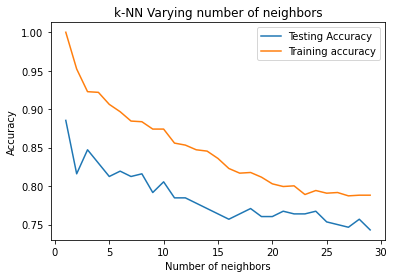

In [17]:
## kNN Machine Learning

#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,30)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
    
#Generate plot
import matplotlib.pyplot as plt

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1) #n_neighbors = k
outknn = knn.fit(X_train,y_train)
print("k={}NN Accuracy on Train Data: {}".format(1,knn.score(X_train,y_train)))
print("k={}NN Accuracy on Test Data: {}".format(1,knn.score(X_test,y_test)))

k=1NN Accuracy on Train Data: 1.0
k=1NN Accuracy on Test Data: 0.8854166666666666


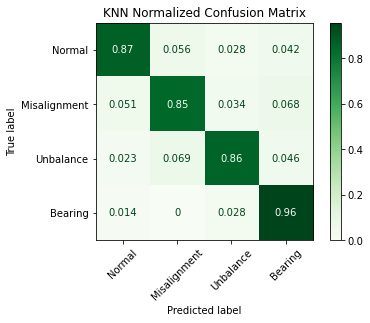

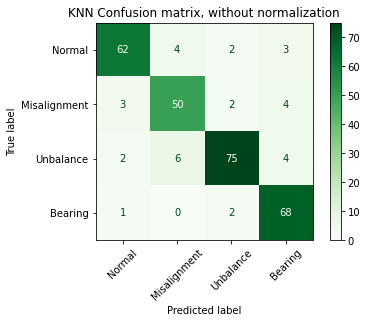

In [19]:
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

# Generate confusion matrix (normalization)
class_names = ['Normal', 'Misalignment', 'Unbalance', 'Bearing']
matrix_1 = plot_confusion_matrix(outknn, X_test, y_test, display_labels=class_names, xticks_rotation=45,
                                 cmap=plt.cm.Greens,
                                 normalize='true')
plt.title('KNN Normalized Confusion Matrix')
plt.show(matrix_1)

matrix_2 = plot_confusion_matrix(outknn, X_test, y_test, display_labels=class_names, xticks_rotation=45,
                                 cmap=plt.cm.Greens,
                                 normalize=None)
plt.title('KNN Confusion matrix, without normalization')
plt.show(matrix_2)

plt.show()

In [20]:
import pickle
# save the model to disk
filename = 'knn_model.sav'
# 'wb' : The w means that you'll be writing to the file, and b refers to binary mode.
pickle.dump(outknn, open(filename, 'wb'))

In [66]:
import pickle
import pandas as pd
import statistics

import time
t_start = time.time()

data_csv= pd.read_csv('D:/ITS/Tugas Akhir/data/Endaq test/bearing/10.csv')  

# PREPROCESSING
#test sumbu x
test_x = pd.DataFrame(data_csv)
test_x.drop(test_x.columns[[0,2,3]], axis=1, inplace=True) #hapus kolom 0,2,3
test_x = np.asarray(test_x)
test_x = (2*((test_x - np.min(test_x)) / (np.max(test_x) - np.min(test_x)))-1) #normalisasi antara -1 dan 1
# FFT sumbu x
n=len(test_x)
dt=1/20000 #time increment in each data
test_x=rfft(test_x)*dt
freq=rfftfreq(n,dt)
test_x=abs(test_x)

#test sumbu y
test_y = pd.DataFrame(data_csv)
test_y.drop(test_y.columns[[0,1,3]], axis=1, inplace=True) #hapus kolom 0,1,3
test_y = np.asarray(test_y)
test_y = (2*((test_y - np.min(test_y)) / (np.max(test_y) - np.min(test_y)))-1) #normalisasi antara -1 dan 1
# FFT sumbu y
n=len(test_y)
dt=1/20000 #time increment in each data
test_y=rfft(test_y)*dt
freq=rfftfreq(n,dt)
test_y=abs(test_y)

#test sumbu z
test_z = pd.DataFrame(data_csv)
test_z.drop(test_z.columns[[0,1,2]], axis=1, inplace=True) #hapus kolom 0,1,2
test_z = np.asarray(test_z)
test_z = (2*((test_z - np.min(test_z)) / (np.max(test_z) - np.min(test_z)))-1) #normalisasi antara -1 dan 1
# FFT sumbu z
n=len(test_z)
dt=1/20000 #time increment in each data
test_z=rfft(test_z)*dt
freq=rfftfreq(n,dt)
test_z=abs(test_z)

# EKSTRAKSI FITUR
# Sumbu x
feature = []
for i in range(1):
    feature.append(mean(test_x[i]))
    feature.append(Max(test_x[i]))
    feature.append(Min(test_x[i]))
    feature.append(pp(test_x[i]))
    feature.append(Variance(test_x[i]))
    feature.append(rms(test_x[i]))
    feature.append(Ab_mean(test_x[i]))
    feature.append(Shapef(test_x[i]))
    feature.append(Impulsef(test_x[i]))
    feature.append(crestf(test_x[i]))
    feature.append(max(abs(test_x[i])))
    feature.append(clearancef(test_x[i]))
    K=kurtosis(test_x[i])
    feature.append(K)
    S=skew(test_x[i], axis=0, bias=False)
    feature.append(S)
test_x = np.array(feature).reshape(1,14)

# Sumbu y
feature = []
for i in range(1):
    feature.append(mean(test_y[i]))
    feature.append(Max(test_y[i]))
    feature.append(Min(test_y[i]))
    feature.append(pp(test_y[i]))
    feature.append(Variance(test_y[i]))
    feature.append(rms(test_y[i]))
    feature.append(Ab_mean(test_y[i]))
    feature.append(Shapef(test_y[i]))
    feature.append(Impulsef(test_y[i]))
    feature.append(crestf(test_y[i]))
    feature.append(max(abs(test_y[i])))
    feature.append(clearancef(test_y[i]))
    K=kurtosis(test_y[i])
    feature.append(K)
    S=skew(test_y[i], axis=0, bias=False)
    feature.append(S)
test_y = np.array(feature).reshape(1,14)

# Sumbu z
feature = []
for i in range(1):
    feature.append(mean(test_z[i]))
    feature.append(Max(test_z[i]))
    feature.append(Min(test_z[i]))
    feature.append(pp(test_z[i]))
    feature.append(Variance(test_z[i]))
    feature.append(rms(test_z[i]))
    feature.append(Ab_mean(test_z[i]))
    feature.append(Shapef(test_z[i]))
    feature.append(Impulsef(test_z[i]))
    feature.append(crestf(test_z[i]))
    feature.append(max(abs(test_z[i])))
    feature.append(clearancef(test_z[i]))
    K=kurtosis(test_z[i])
    feature.append(K)
    S=skew(test_z[i], axis=0, bias=False)
    feature.append(S)
test_z = np.array(feature).reshape(1,14)

data_test = np.concatenate((test_x, test_y, test_z), axis=1)
data_test = np.nan_to_num(data_test)

#load the model from disk
# 'rb' : The r stands for read mode and the b stands for binary mode.
filename = 'knn_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
pred = loaded_model.predict(data_test)

dict_label = {0: "Normal", 1:"misalignment", 2:"unbalance", 3:"bearing"}
print(dict_label)
print("Hasil prediksi kerusakan: %s" % (pred))
print("Execution Time: %s seconds " % (time.time() - t_start))

{0: 'Normal', 1: 'misalignment', 2: 'unbalance', 3: 'bearing'}
Hasil prediksi kerusakan: [3]
Execution Time: 0.34005212783813477 seconds 
